In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('electronics.csv', sep=',', header=0)
df

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

item_id - 0%
user_id - 0%
rating - 0%
timestamp - 0%
model_attr - 0%
category - 0%
brand - 74%
year - 0%
user_attr - 87%
split - 0%


In [5]:
df.isna().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

In [6]:
df.fillna(value={'brand': 'Other', 'user_attr': '-'}, inplace=True)

In [7]:
df.isna().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
dtype: int64

In [8]:
df['order_date'] = pd.to_datetime(df.timestamp, format='%Y.%m.%d')

In [9]:
df['month'] = df.order_date.dt.month

In [10]:
df['day_of_week'] = df.order_date.dt.day_name()

In [11]:
df

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,order_date,month,day_of_week
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,Other,1999,-,0,1999-06-13,6,Sunday
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,Other,1999,-,0,1999-06-14,6,Monday
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,Other,1999,-,0,1999-06-17,6,Thursday
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,Other,1999,-,0,1999-07-01,7,Thursday
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,Other,1999,-,0,1999-07-06,7,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,-,0,2018-09-26,9,Wednesday
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,Other,2017,-,0,2018-09-26,9,Wednesday
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,Other,2016,-,0,2018-09-26,9,Wednesday
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,Other,2018,-,0,2018-09-29,9,Saturday


In [12]:
df.to_csv('electronics_bestymd.csv', sep=',', index=False, columns=['item_id', 'user_id', 'category', 'brand', 'order_date',
                                                                    'year', 'month', 'day_of_week'])

In [13]:
df2 = pd.read_csv('electronics_bestymd.csv', sep=',', header=0)
df2

,item_id,user_id,category,brand,order_date,year,month,day_of_week
0,0,0,Portable Audio & Video,Other,1999-06-13,1999,6,Sunday
1,0,1,Portable Audio & Video,Other,1999-06-14,1999,6,Monday
2,0,2,Portable Audio & Video,Other,1999-06-17,1999,6,Thursday
3,0,3,Portable Audio & Video,Other,1999-07-01,1999,7,Thursday
4,0,4,Portable Audio & Video,Other,1999-07-06,1999,7,Tuesday
...,...,...,...,...,...,...,...,...
1292949,9478,1157628,Headphones,Etre Jeune,2018-09-26,2017,9,Wednesday
1292950,9435,1157629,Computers & Accessories,Other,2018-09-26,2017,9,Wednesday
1292951,9305,1157630,Computers & Accessories,Other,2018-09-26,2016,9,Wednesday
1292952,9303,1157631,Headphones,Other,2018-09-29,2018,9,Saturday


In [14]:
df2.month.value_counts()

1     140773
12    124597
3     116464
2     110546
8     109835
7     107612
4      99136
5      98207
9      97368
11     97015
6      96317
10     95084
Name: month, dtype: int64

In [16]:
res_month = df2.groupby('month')[['item_id']].count()
res_month

,item_id
month,
1,140773
2,110546
3,116464
4,99136
5,98207
6,96317
7,107612
8,109835
9,97368


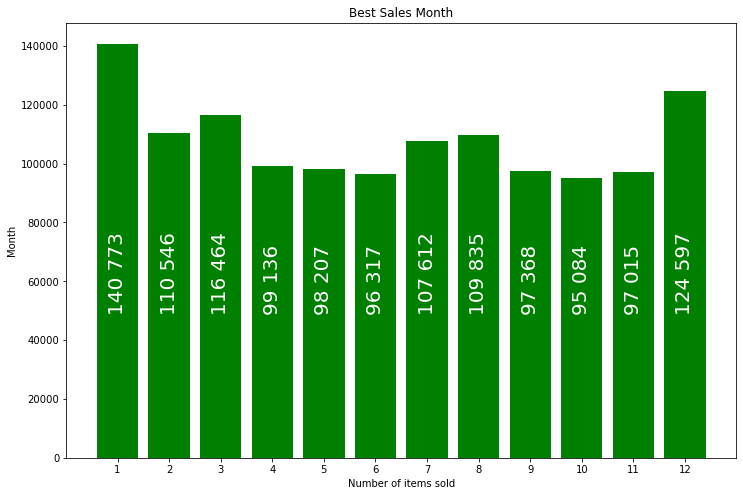

In [20]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.bar(res_month.index, res_month.item_id, color = "green")
plt.xticks(range(1, 13))
plt.yticks(range(0, int(round(res_month.max()[0])), 20000))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Number of items sold')
plt.ylabel('Month')

for index, value in enumerate(res_month.item_id):
    plt.text(
        index+1,
        50000,
        '{0:,}'.format(round(value)).replace(',', ' '),
        rotation='vertical',
        size='20',
        color='#fff',
        ha='center')
    
plt.title('Best Sales Month')    
plt.show()

In [21]:
res_day = df2.groupby('day_of_week')[['item_id']].count()
res_day

,item_id
day_of_week,
Friday,178552
Monday,206745
Saturday,158912
Sunday,160916
Thursday,189397
Tuesday,201780
Wednesday,196652


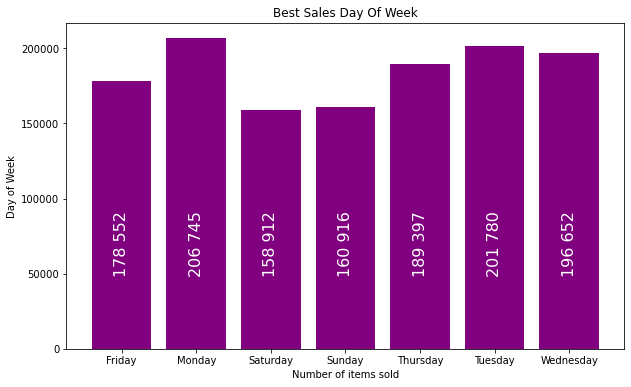

In [25]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.bar(res_day.index, res_day.item_id, color = "purple")
plt.xticks(range(0, 7))
plt.yticks(range(0, int(round(res_day.max()[0])), 50000))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Number of items sold')
plt.ylabel('Day of Week')

for index, value in enumerate(res_day.item_id):
    plt.text(
        index,
        50000,
        '{0:,}'.format(round(value)).replace(',', ' '),
        rotation='vertical',
        size='16',
        color='#fff',
        ha='center')

plt.title('Best Sales Day Of Week') 
plt.show()

In [26]:
res_year = df2.groupby('year')[['item_id']].count()
res_year

,item_id
year,
1999,118
2000,3572
2001,702
2002,955
2003,3949
2004,7195
2005,11577
2006,16336
2007,17989


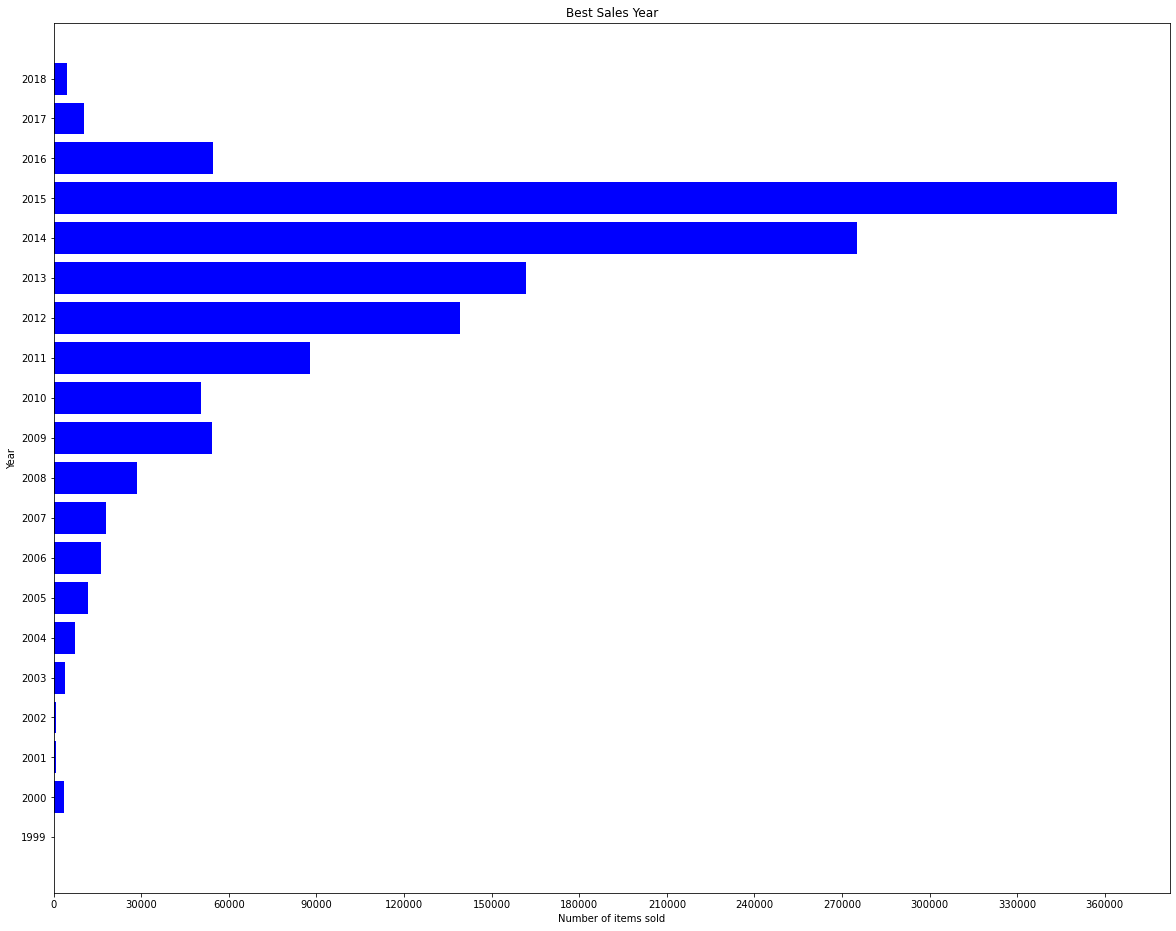

In [28]:
plt.rcParams['figure.figsize'] = [20, 16]
plt.barh(res_year.index, res_year.item_id, color = "blue")
plt.yticks(range(1999, 2019))
plt.xticks(range(0, int(round(res_year.max()[0])), 30000))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Number of items sold')
plt.ylabel('Year') 
plt.title('Best Sales Year') 
plt.show()